### Forescasting: Séries Temporais e Aprendizado de Máquinas

### Introdução às Séries Temporais

Uma série temporal é uma série de pontos de dados ordenados no tempo. Nesse tipo de análise, o tempo é uma sequência de observações ou medidas coletadas em intervalos de tempo regulares ou irregularesm, registradas em ordem cronológica e associadas a momentos específicos no tempo.

As séries temporais estão presentes em diversas áreas, e são utilizadas para analisar e compreender o comportamento ao longo do tempo, identificar padrões, realizar previsões e tomar decisões baseadas em dados históricos. 

<img src="https://drive.google.com/uc?id=1r-69dYMTZ3_IreXBBMDc7g9clQWXgh6D" width="700" align="center"/></img>


**Imagens:** Óbitos Trimestral por câncer de pele entre 1996 e 2012. Nunes, V. et al.



#### Componentes de uma série temporal


As séries temporais podem ser decompostas em diferentes componentes, que representam diferentes fontes de variação ou padrões presentes nos dados. A decomposição é um processo que separa a série em componentes distintos, como tendência, sazonalidade e componentes residuais (ou irregulares). 

Os principais componentes de uma série temporal são:

- **Tendência:** A tendência existe quando há um aumento ou diminuição de longo prazo nos dados. Essa tendência não precisa ser linear. Exemplo: Aumento da cobertura vacinal entre crianças de 5 a 11 anos no Brasil.

<img src="https://drive.google.com/uc?id=1m5dSAXn6CVW1uNDBAn7fXFc_C0EYd7Se" width="500" align="center"/></img>

    Imagem: Observatório Covid-19 Fiocruz/Reprodução

- **Sazonalidade:** Ocorre quando uma série temporal é afetada por fatores sazonais, como a época do ano ou o dia da semana. É uma frequência fixa e conhecida. Exemplo: Aumento da venda de antibiótico em um período do ano.

<img src="https://drive.google.com/uc?id=1DyULG2d5lOw-lR42Obki-nuxjOFRtYdA" width="500" align="center"/></img>


    Imagem: Venda de Antibiótico na Austrália

- **Ciclo:** Quando os dados exibem aumentos e quedas que não são de uma frequência fixa. Exemplo: A série apresenta uma forte sazonalidade dentro de cada ano, e um forte comportamento cíclico com um período de 6 a 10 anos. 

<img src="https://drive.google.com/uc?id=10dDiiYvCUJN3pODQg9S00KvNeUc8ZTGG" width="500" align="center"/></img>

    Imagem: Vendas de novas casas para uma família  nos EUA


- **Componente Irregular ou Residual:** é a variação não explicada pelas tendências, sazonalidades e ciclos identificados anteriormente. É a parte imprevisível da série temporal que não pode ser atribuída a padrões específicos.

#### Análise exploratória de dados temporais

A análise exploratória de uma série temporal envolve a investigação e compreensão dos padrões, tendências e características dos dados. Geralmente, na análise exploratória utilizamos algumas etapas como:
- Estatísticas Descritivas
- Identificação de Outliers
- Visualização da série
- Identificação da Tendência
- Análise da Sazonalidade
- Estacionariedade
- Correlação e Autocorrelações

O objetivo principal dessa análise é explorar e compreender os padrões e características dos dados antes de seguir para técnicas de modelagem ou previsão mais avançadas.

##### Série Temporal de ações

In [68]:
#!pip install yahooquery
from yahooquery import Ticker

In [97]:
# Definir datas e tickers
inicio = '2000-01-01'
fim = '2023-07-10'
tickers = ['PETR4.SA','ITUB3.SA']

In [148]:
# Baixar histórico
bd = Ticker(tickers)
bd = bd.history(start=inicio,end=fim)
petr = bd.loc['PETR4.SA',:]

In [165]:
# Criar o gráfico de candlestick
config = {
    'x': petr.index,
    'open': petr.open,
    'close': petr.close,
    'high': petr.high,
    'low': petr.low,
    'type': 'candlestick',
    'showlegend': False
}
data = [config]
layout = go.Layout()
fig = go.Figure(data=data, 
                layout=layout)
fig.show()

#### Estacionariedade e transformações de séries temporais

Se uma série temporal se comporta de forma aleatória ao longo do tempo e em torno de uma média constante, ela é chamada de série estacionária. Nesse tipo de série, as propriedades não dependem do tempo em que a série é observada.

Séries temporais com tendências, ou com sazonalidade, **não são estacionárias**, ou seja, a tendência e a sazonalidade afetarão o valor da série temporal em momentos diferentes.

<img src="https://drive.google.com/uc?id=1nH5nIuyAZedXW7pLgmFw0IJRx6M9GU3X" width="500" align="center"/></img>


Imagem: Série Temporal Estacionária


#### Identificando uma série estacionária

Existem diversos testes estatísticos que podem ser usados para verificar a estacionariedade de uma série temporal, um dos testes mais utilizados é o Teste de Dickey-Fuller Aumentado. 

O Teste Dickey-Fuller é utilizado para verificar se uma série temporal possui raiz unitária, o que indica a presença de não estacionariedade. 

A hipótese nula (H0) do teste de Dickey-Fuller é que a série possui raiz unitária, e isso indica que a série não é estacionária. A hipótese alternativa (H1) indica que a série não possui raiz unitária, ou seja, a série é estacionária. Ao utilizar esse teste, podemos determinar se uma série requer diferenciação para se tornar estacionária antes de aplicar técnicas de modelagem, como modelos ARIMA.

No mundo real, é mais comum encontrarmos séries não estacionárias, como a série da cobertura vacinal de primeira dose da vacina contra o COVID-19 entre crianças de 5 a 11 anos no Brasil.

<img src="https://drive.google.com/uc?id=1m5dSAXn6CVW1uNDBAn7fXFc_C0EYd7Se" width="500" align="center"/></img>

    Imagem: Observatório Covid-19 Fiocruz/Reprodução

Existe uma vasta literatura para ajustes de modelos de série estacionárias, vamos abordar os Modelos Autorregressivos (AR), onde a previsão futura depende do comportamento passado da própria série, ou períodos históricos

In [340]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### Série não estacionária

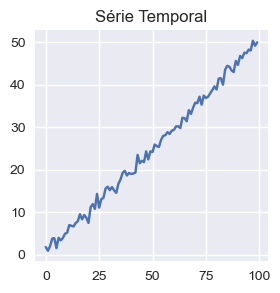

In [312]:
# Criar uma série temporal fictícia Não Estacionária
np.random.seed(0)
tempo = np.arange(0,100)
tendencia = 0.5 * tempo
serie = np.random.randn(100)+tendencia

#Gráfico
plt.figure(figsize=(3,3))
plt.plot(serie)
plt.title('Série Temporal')
plt.show()

In [313]:
# Aplicar o teste de Dickey-Fuller Aumentado (ADF)
teste = adfuller(serie)

# Valor-p do teste
p_valor = teste[1]
print(f'p-valor: {p_valor}')

p-valor: 0.998736655331758


In [314]:
# Verificar a estacionariedade com valor-p
if p_valor < 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

A série não é estacionária.


##### Série Estacionária

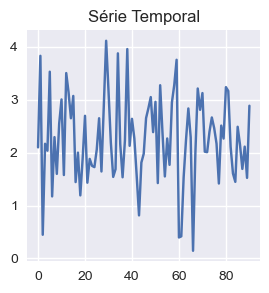

In [315]:
#Gerar série estacionária
np.random.seed(1)
tamanho = 100
tempo = np.arange(tamanho)
tendencia = 0.5 * tempo
ruido = np.random.randn(tamanho) 
serie = tendencia + ruido

# Remover a média móvel
janela = 10
media_movel = np.convolve(serie, np.ones(janela), 'valid') / janela
serie = serie[janela-1:] - media_movel

# Gráfico
plt.figure(figsize=(3,3))
plt.plot(serie)
plt.title('Série Temporal')
plt.show()

In [316]:
# Aplicar o teste de Dickey-Fuller Aumentado (ADF)
teste = adfuller(serie)

# Valor-p do teste
p_valor = teste[1]
print(f'p-valor: {p_valor}')

p-valor: 5.175304397575759e-10


In [317]:
# Verificar a estacionariedade com valor-p
if p_valor < 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

A série é estacionária.


### Modelos de Séries Temporais Clássicos

Um modelo de série temporal clássico é um modelo estatístico amplamente utilizado para analisar, descrever e prever séries temporais. Esses modelos têm uma estrutura bem definida e são baseados em suposições e abordagens estatísticas tradicionais.

Os modelos clássicos são projetados para capturar características comuns encontradas em muitas séries temporais, como tendências, sazonalidade e autocorrelação. Eles são fundamentados em teoria estatística e seguem princípios estabelecidos.

Os modelos mais comuns são:
##### Modelo de Média Móvel (MA)
Usado para capturar a influência de choques ou ruído aleatório passado na série temporal. Ele assume que o valor atual da série é uma combinação linear dos erros passados.
 
##### Modelo de Média Móvel Autorregressiva (ARMA)
Esse modelo captura tanto a influência dos erros passados quanto a dependência dos próprios valores passados da série.

##### Modelo de Média Móvel Autorregressiva com Termos de Diferenciação (ARIMA)
É uma extensão do modelo ARMA que incorpora a diferenciação dos valores da série para torná-la estacionária

##### Modelo de Média Móvel Autorregressiva com Termos de Diferenciação e Componentes Sazonais (SARIMA)
Esse modelo incorpora componentes sazonais na modelagem de séries temporais. Ele é adequado para séries que exibem padrões sazonais.

##### Modelo de Suavização Exponencial (ES)
São usados para modelar séries temporais com base em combinações ponderadas de observações passadas.


### Metodologia Box & Jenkins

O método Box-Jenkins, também conhecida como abordagem Box-Jenkins, é uma abordagem sistemática e iterativa, em que os modelos são refinados e ajustados conforme necessário. Esse método foi desenvolvido por George Box e Gwilym Jenkins na década de 70 e é um dos métodos mais utilizados para modelagem de séries temporais.

Esse abordagem se concentra em três etapas principais: identificação, estimativa e diagnóstico, que podem ser resumidas em:


**Identificação:** Nesta etapa, o objetivo é identificar a ordem adequada do modelo ARIMA (Autoregressive Integrated Moving Average) para a série temporal. Isso é feito analisando os gráficos de autocorrelação (ACF) e autocorrelação parcial (PACF) da série. A análise desses gráficos ajuda a determinar a presença de componentes autorregressivos (AR) e de média móvel (MA) na série, o que ajuda a selecionar os valores apropriados para os parâmetros do modelo ARIMA (p, d, q).

**Estimação:** Nesta etapa, o modelo ARIMA é ajustado aos dados da série temporal. Os parâmetros do modelo são estimados usando métodos estatísticos, como a máxima verossimilhança, que procuram encontrar os valores que melhor se ajustam aos dados observados.

**Diagnóstico:** Após a estimação do modelo, é importante realizar um diagnóstico para verificar se o modelo é adequado. Isso envolve analisar os resíduos do modelo, que são os erros entre as previsões do modelo e os valores reais da série temporal. Os resíduos devem ser estacionários, não mostrando padrões significativos nos gráficos de autocorrelação e autocorrelação parcial. Diversos testes estatísticos podem ser aplicados para verificar a aleatoriedade e a normalidade dos resíduos.


### Modelos de média móvel (MA)

Os modelos de média móvel são amplamente utilizados para prever valores futuros com base em médias de observações passadas. Os modelos de média móvel são denotados como MA(q), onde "MA" significa média móvel e "q" representa a ordem do modelo. A ordem do modelo (q) indica o número de termos de média móvel incluídos no modelo. Cada termo de média móvel é uma combinação linear dos erros passados da série temporal.

A ideia principal desse modelo é capturar padrões ou componentes de ruído aleatório que não podem ser explicados pelos termos de média móvel anteriores. O modelo de média móvel considera que cada observação da série temporal é uma combinação linear dos termos de média móvel e um termo de erro aleatório.

Por exemplo, um modelo de média móvel de ordem 1, MA(1), pode ser expresso da seguinte forma: y(t) = c + ε(t) + θ₁ε(t-1)

onde: 

 - y(t) é o valor da série temporal no tempo "t"
 - c é uma constante
 - ε(t) é o erro aleatório no tempo "t"
 - θ₁ é o coeficiente que multiplica o erro no tempo "t-1"
 
 
Os modelos de média móvel são úteis para capturar componentes de curto prazo em uma série temporal, como choques ou variações rápidas. Eles são eficazes quando a série temporal não exibe tendências ou padrões de sazonalidade significativos.

O modelo de Média Móvel (MA) têm um número infinito de classes, pois a ordem do modelo pode ser qualquer número inteiro não negativo. Um modelo denotado como MA(q), onde "q" determina o número de termos de média móvel incluídos no modelo.

Por exemplo:
- MA(1) possui um termo de média móvel.
- MA(2) possui dois termos de média móvel.
- MA(q) possui "q" termos de média móvel.


##### Médias móveis no Python
Para esse exemplo, vamos utilizar a base de precipitação mensal acumulada da cidade de Barcelona desde 1786. A precipitação é fornecida em milímetros (mm).

A base pode encontrada em: [barcelona.cat](https://opendata-ajuntament.barcelona.cat/data/en/dataset/precipitacio-hist-bcn)

In [590]:
# Carregar Base de Dados
base = pd.read_csv('precipitacionsbarcelonadesde1786.csv')

In [591]:
base.head()

,Any,Precip_Acum_Gener,Precip_Acum_Febrer,Precip_Acum_Marc,Precip_Acum_Abril,Precip_Acum_Maig,Precip_Acum_Juny,Precip_Acum_Juliol,Precip_Acum_Agost,Precip_Acum_Setembre,Precip_Acum_Octubre,Precip_Acum_Novembre,Precip_Acum_Desembre
0,1786,32.8,28.4,84.4,42.3,8.5,38.0,6.8,52.1,62.0,57.0,195.8,114.1
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9


In [592]:
# Definir a coluna ano como índice
base.set_index('Any',inplace=True)

In [593]:
# Alterar o nome do índice de Any para ano
base.index.name = 'ano'

In [594]:
# Cada coluna representa a precipitação acumulada do mês. Vamos somar e obter o acumulado anual
base['Chuva_Acumulada'] = base.sum(axis=1)
base = base[['Chuva_Acumulada']]

In [483]:
base.head()

,Chuva_Acumulada
ano,
1786,722.2
1787,625.1
1788,728.8
1789,342.5
1790,855.7


##### Visualização Gráfica

In [484]:
import matplotlib.pyplot as plt

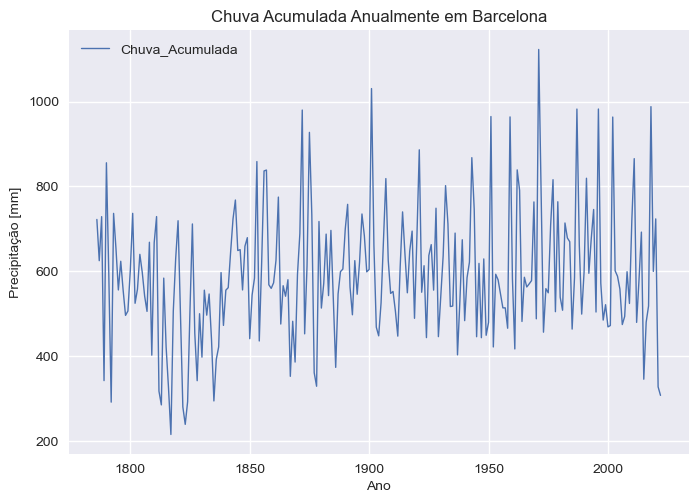

In [485]:
plt.style.use('seaborn')

base.plot(linewidth=1)

plt.title('Chuva Acumulada Anualmente em Barcelona')
plt.xlabel('Ano', fontsize=10)
plt.ylabel('Precipitação [mm]', fontsize=10)
plt.show()

In [486]:
pd.options.mode.chained_assignment = None

In [487]:
# Visualizar a média móvel para 10 anos
base['MA_10'] = base.Chuva_Acumulada.rolling(10, min_periods=1).mean()

In [488]:
# Visualizar a média móvel para 20 anos
base['MA_20'] = base.Chuva_Acumulada.rolling(20, min_periods=1).mean()

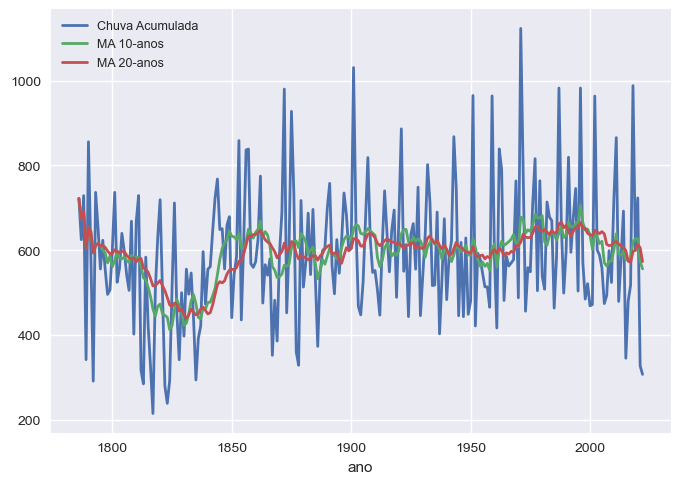

In [489]:
#Gráfico
base.plot(linewidth=2)

plt.legend(labels =['Chuva Acumulada', 'MA 10-anos', 'MA 20-anos'], fontsize=9)
plt.show()

In [490]:
# Previsão para o próximo ano
ultimo_valor = base['MA_10'].iloc[-1]

In [491]:
ultimo_valor

556.3599999999999

### Modelos autorregressivos (AR)

Em um modelo de regressão múltipla, prevemos a variável de interesse usando uma combinação linear de preditores. 

$\hat y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p$

Em um modelo de autorregressão (AR), prevemos a variável de interesse usando uma combinação linear de valores passados da variável. Por exemplo: o valor da série no tempo t depende do que aconteceu, por exemplo, t-1, t-2, t-3, etc.

$Y(t) = \beta_0 + \beta_1 Y(t-1) + \beta_2 Y(t-2) + \ldots + \beta_p Y(t-p) + ε(t)$

onde:

- Y(t) é o valor da série temporal no período t,
- 𝛽0 é uma constante (ou intercepto),
- 𝛽1, 𝛽2, ..., 𝛽p são os coeficientes dos termos autoregressivos,
- Y(t-1), Y(t-2), ..., Y(t-p) são os valores anteriores da série temporal considerados na previsão,
- ε(t) é o termo de erro (ou resíduo) aleatório no período t.


Em um modelo autoregressivo, a previsão de um valor em um determinado momento depende de uma combinação linear dos valores anteriores da série temporal. 

Um modelo AR de ordem p é denotado como AR(p).A ordem do modelo autoregressivo especifica o número de valores anteriores considerados na previsão. Cada termo autoregressivo é multiplicado por um coeficiente que determina o peso do valor anterior na previsão.

A ordem do modelo (p) determina o número de termos anteriores que são levados em consideração na previsão. Quanto maior o valor de p, maior é a dependência temporal dos valores anteriores na previsão.

#### Autocorrelação

Autocorrelação é uma medida estatística que quantifica o grau de correlação entre uma série temporal e suas versões atrasadas, ou seja, indica como os valores passados de uma série temporal estão relacionados entre si.

Existem várias maneiras de calcular a autocorrelação, sendo uma das mais utilizadas a função de autocorrelação (ACF), que mede a correlação entre um valor da série temporal e seus valores anteriores em diferentes lags. A ACF é uma medida de autocorrelação de primeira ordem.

A autocorrelação pode assumir valores entre -1 e 1. Um valor positivo próximo de 1 indica uma forte correlação positiva. Um valor negativo próximo de -1 indica uma forte correlação negativa. Um valor próximo de 0 indica ausência de correlação linear.

##### Verificar rapidamente se há correlação

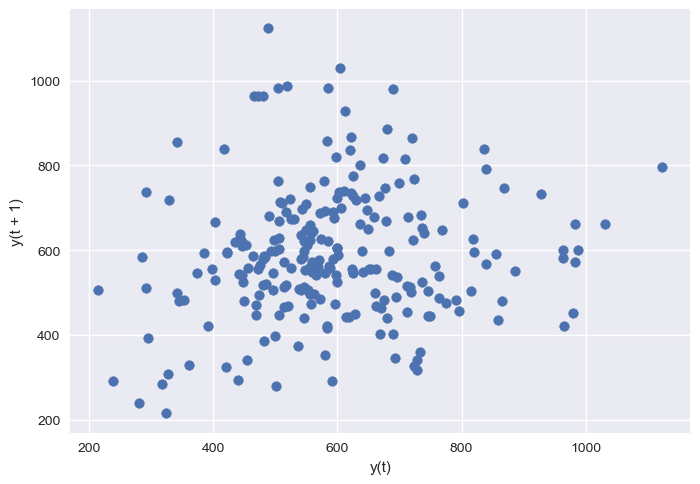

In [492]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(base['Chuva_Acumulada'],lag=1)
pyplot.show()

#### Gráficos ACF e PACF

In [493]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

O ACF e PACF são duas funções importantes: a função de autocorrelação (ACF) e a função de autocorrelação parcial (PACF). Essas funções são usadas para entender a relação entre os valores de uma série temporal e seus valores passados (lags).

**Função de Autocorrelação (ACF):**
Mede a correlação entre um valor em um determinado lag (atraso) e os valores anteriores da série temporal. De forma bem simples, a ACF mede como os valores passados estão correlacionados com o valor atual da série.

O gráfico da ACF exibe a correlação em diferentes lags, com o eixo horizontal representando os lags e o eixo vertical representando os valores da correlação. A ACF pode ajudar a identificar padrões de dependência temporal, como sazonalidade ou autocorrelação significativa em lags específicos.

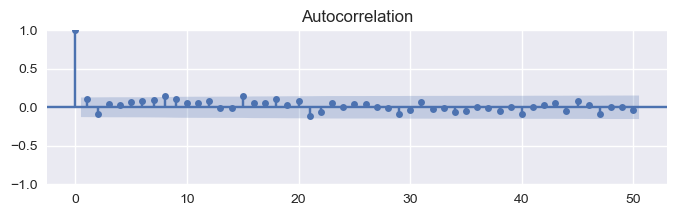

In [494]:
fig, ax = plt.subplots(figsize=(8,2))
plot_acf(base['Chuva_Acumulada'], lags=50, ax=ax)
plt.show()

**Função de Autocorrelação Parcial (PACF):**
A função de autocorrelação parcial (PACF) mede a correlação entre um valor em um determinado lag (atraso) e os valores anteriores da série temporal, excluindo a influência dos lags intermediários. De forma simples, a PACF mede a correlação direta entre um valor e seus lags anteriores, eliminando o efeito dos lags intermediários.

O gráfico da PACF exibe a correlação parcial em diferentes lags, com o eixo horizontal representando os lags e o eixo vertical representando os valores da correlação parcial. A PACF pode ajudar a identificar os lags mais relevantes e significativos para a modelagem da série temporal, ajudando a determinar a ordem de modelos autorregressivos (AR).

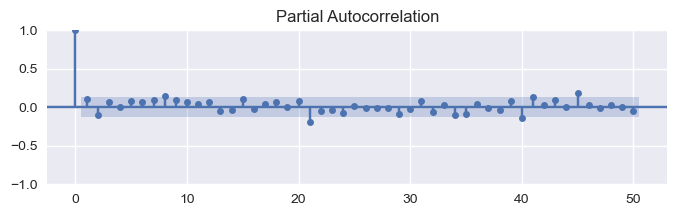

In [496]:
fig, ax = plt.subplots(figsize=(8,2))
plot_pacf(base['Chuva_Acumulada'], lags=50, ax=ax)
plt.show()

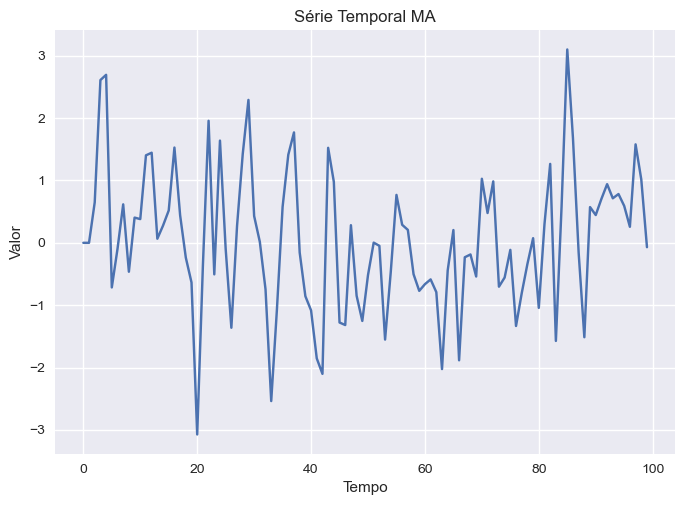

In [497]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo MA
order = 2
coefficients = [0.5, -0.3]  # Coeficientes do modelo MA

# Simulação da série MA
np.random.seed(0)
n_samples = 100  # Número de amostras
epsilon = np.random.normal(0, 1, n_samples)
ma_series = np.zeros(n_samples)

for i in range(order, n_samples):
    ma_series[i] = epsilon[i] + coefficients[0] * epsilon[i-1] + coefficients[1] * epsilon[i-2]

# Plot da série MA
plt.plot(ma_series)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Série Temporal MA')
plt.show()

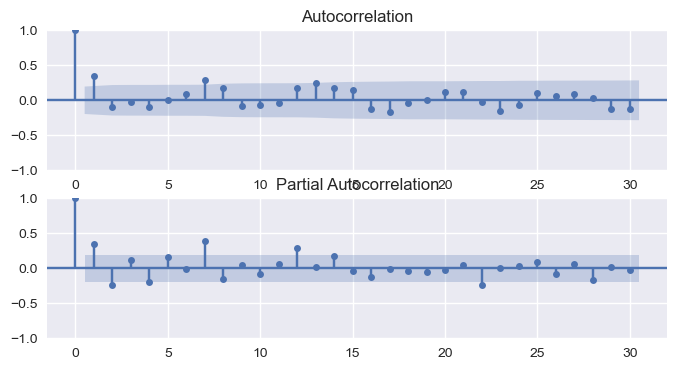

In [498]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(8,4))
plot_acf(ma_series, lags=30, ax=ax[0])
plot_pacf(ma_series, lags=30, ax=ax[1])

plt.show()

##### Como interpretar o ACF e PACF

<table>
<thead>
  <tr>
    <th></th>
    <th>AR(p)</th>
    <th>MA(q)</th>
    <th>ARMA(p, q)</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>ACF</td>
    <td>Diminui (Decadência geométrica)</td>
    <td>Significativo em cada lag q / Cai após o lag q</td>
    <td>Diminui (Decadência geométrica)</td>
  </tr>
  <tr>
    <td>PACF</td>
    <td>Significativo em cada lag p / Cai após o lag p</td>
    <td>Diminui (Decadência geométrica)</td>
    <td>Diminui (Decadência geométrica)</td>
  </tr>
</tbody>
</table>

_Tabela Extraída Kaggle: [Time Series: Interpreting ACF and PACF](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf#Fundamentals)_

A identificação se um modelo é de média móvel (MA) ou autorregressivo (AR) pode ser realizada por meio da análise dos gráficos da função de autocorrelação (ACF) e da função de autocorrelação parcial (PACF). 

Esses gráficos fornecem informações sobre a dependência temporal presente na série temporal e ajudam a determinar a ordem adequada do modelo.

Temos alguns passos para identificar se um modelo é MA ou AR com base na análise dos gráficos da ACF e PACF:

**Modelo de Média Móvel (MA):** 
- **ACF:** No gráfico da ACF, se a autocorrelação diminui rapidamente e se torna insignificante após alguns lags, enquanto a autocorrelação parcial não mostra uma queda abrupta, isso pode indicar um modelo MA. Em um modelo MA, a ACF geralmente tem um decaimento exponencial ou senoidal.
- **PACF:** No gráfico da PACF, se a autocorrelação parcial mostra uma queda abrupta após alguns lags, enquanto a autocorrelação permanece significativa em vários lags, isso pode indicar um modelo MA. A PACF de um modelo MA tende a se tornar zero após a ordem do modelo.


**Modelo Autorregressivo (AR):**
- **ACF:** No gráfico da ACF, se a autocorrelação diminui gradualmente à medida que os lags aumentam, isso pode indicar um modelo AR. Em um modelo AR, a ACF diminui lentamente, mostrando uma autocorrelação significativa em vários lags.
- **PACF:** No gráfico da PACF, se a autocorrelação parcial diminui após alguns lags e se torna insignificante após alguns lags, isso pode indicar um modelo AR. A PACF de um modelo AR geralmente diminui abruptamente após a ordem do modelo.


É importante ressaltar que a interpretação dos gráficos da ACF e PACF é uma indicação inicial e não é uma regra rígida. A análise deve ser complementada com outros métodos de seleção de modelo, como critérios de informação (por exemplo, AIC ou BIC) e avaliação de resíduos, para garantir uma seleção adequada do modelo.

In [499]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

In [500]:
# Treinamento e Teste
#ultimos_anos = base.index[-5:]
#test = base.loc[ultimos_anos]
#train = base.loc[~base.index.isin(ultimos_anos)]

In [568]:
ar_modelo = AutoReg(base[['Chuva_Acumulada']], lags=2).fit()

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [569]:
ar_modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:        Chuva_Acumulada   No. Observations:                  237
Model:                     AutoReg(2)   Log Likelihood               -1515.599
Method:               Conditional MLE   S.D. of innovations            152.997
Date:                Wed, 12 Jul 2023   AIC                           3039.199
Time:                        01:33:19   BIC                           3053.037
Sample:                             2   HQIC                          3044.778
                                  237                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                576.3261     52.875     10.900      0.000     472.692     679.960
Chuva_Acumulada.L1     0.1247      0.065      1.909      0.056      -0.003       0.253
Chuva_Acumulada.L2    -0.1013      0.066     -1.545      0.122      -0.230       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6151           -3.0806j            3.1414           -0.2186
AR.2            0.6151           +3.0806j            3.1414            0.2186
-----------------------------------------------------------------------------
"""

In [571]:
pred = ar_modelo.predict(start=len(base), end=len(base)+5, dynamic=False)

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [572]:
pred

237    581.464949
238    617.626928
239    594.393562
240    587.833140
241    589.369645
242    590.225951
dtype: float64

### Modelos MA

In [554]:
import statsmodels.api as sm

In [584]:
modelo_ma = sm.tsa.arima.ARIMA(base[['Chuva_Acumulada']], order=(0,0,1)) # Ordem do modelo MA (p, d, q)

resultado_ma = modelo_ma.fit()

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [586]:
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:        Chuva_Acumulada   No. Observations:                  237
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1528.681
Date:                Wed, 12 Jul 2023   AIC                           3063.362
Time:                        01:41:59   BIC                           3073.766
Sample:                             0   HQIC                          3067.556
                                - 237                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        590.6515     12.204     48.398      0.000     566.732     614.571
ma.L1          0.1443      0.067      2.168      0.030       0.014       0.275
sigma2      2.336e+04   1945.466     12.008      0.0

In [587]:
previsoes = resultado_ma.predict(start=len(base), end=len(base)+5)  # Previsão para os próximos 5 períodos

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [588]:
print(previsoes)

237    555.720026
238    590.651456
239    590.651456
240    590.651456
241    590.651456
242    590.651456
Name: predicted_mean, dtype: float64


### Modelos ARMA

O modelo ARMA (Autoregressive Moving Average) combina componentes autorregressivos (AR) e de média móvel (MA) em um único modelo para capturar a estrutura de dependência temporal dos dados.

Ao combinar os componentes AR e MA, o modelo ARMA é capaz de capturar tanto a dependência dos valores passados quanto a influência dos erros residuais passados na série temporal.

A ordem de um modelo ARMA é especificada como (p, q), onde p é a ordem do componente autorregressivo (AR) e q é a ordem do componente de média móvel (MA). Por exemplo, um modelo ARMA(1, 1) possui um termo autorregressivo de ordem 1 e um termo de média móvel de ordem 1.

In [589]:
modelo_ma = sm.tsa.arima.ARIMA(base[['Chuva_Acumulada']], order=(0,1,1)) # Ordem do modelo MA (p, d, q)

resultado_ma = modelo_ma.fit()

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



### Análise Exploratória de Dados

In [21]:
#!pip install ydata_profiling

In [25]:
import pandas as pd
from ydata_profiling.visualisation.plot import timeseries_heatmap
from ydata_profiling import ProfileReport

In [10]:
#https://www.kaggle.com/datasets/sogun3/uspollution
base = pd.read_csv('pollution_us_2000_2016.csv', index_col=[0])

In [11]:
base.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [12]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746661 entries, 0 to 24603
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Units          object 
 9   NO2 Mean           float64
 10  NO2 1st Max Value  float64
 11  NO2 1st Max Hour   int64  
 12  NO2 AQI            int64  
 13  O3 Units           object 
 14  O3 Mean            float64
 15  O3 1st Max Value   float64
 16  O3 1st Max Hour    int64  
 17  O3 AQI             int64  
 18  SO2 Units          object 
 19  SO2 Mean           float64
 20  SO2 1st Max Value  float64
 21  SO2 1st Max Hour   int64  
 22  SO2 AQI            float64
 23  CO Units           object 
 24  CO Mean            float64
 25  CO 1st Max Value   f

In [13]:
base = base[base['State']=='New York']
base['Date Local'] = pd.to_datetime(base['Date Local'])

In [14]:
filtrada = base[['Date Local','Site Num','County','NO2 Mean','O3 AQI','CO AQI']]

In [16]:
perfil = ProfileReport(filtrada, 
                       tsmode=True, 
                       sortby="Date Local",
                       minimal=True
                      )
perfil.to_file('relatorio.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Anexo

### Algoritmos de regressão para séries temporais

**Regressão Linear:** É um método simples que estabelece uma relação linear entre as variáveis dependentes e independentes. Pode ser usado para prever valores futuros em uma série temporal.

**Regressão de Árvore de Decisão:** Utiliza uma estrutura de árvore para dividir os dados em subconjuntos com base em condições específicas. Pode ser aplicado a séries temporais para previsões.

**Random Forest:** É um conjunto de árvores de decisão que trabalham em conjunto para realizar previsões. Pode ser eficaz em lidar com a natureza complexa e não linear das séries temporais.

**Regressão de Vetor de Suporte (SVR):** É uma extensão do algoritmo de máquina de vetores de suporte (SVM) para problemas de regressão. Pode ser aplicado a séries temporais para prever valores futuros.

**Regressão por Processo Gaussiano (GPR):** É um modelo probabilístico que assume uma distribuição gaussiana sobre os dados. Pode ser usado para fazer previsões em séries temporais, capturando a incerteza associada às previsões.

**Redes Neurais Artificiais (NNA):** As redes neurais podem ser usadas para modelar relações complexas em séries temporais. As arquiteturas comuns incluem redes neurais de alimentação direta (feedforward) e redes neurais recorrentes (RNNs), como as LSTM (Long Short-Term Memory), que são especialmente adequadas para lidar com dependências temporais.

**Gradient Boosting:** Algoritmos de gradient boosting, como Gradient Boosted Trees (GBT) ou XGBoost, podem ser usados para prever séries temporais, combinando várias árvores de decisão.

### Algoritmos de classificação para séries temporais

**k-Nearest Neighbors (k-NN):** O algoritmo k-NN pode ser aplicado a séries temporais por meio da definição de uma métrica apropriada para medir a similaridade entre as séries. A classificação é feita com base nas classes dos vizinhos mais próximos.

**Support Vector Machines (SVM):** As máquinas de vetores de suporte também podem ser usadas para classificar séries temporais. Nesse caso, é necessário definir uma representação apropriada para as séries, como por meio de extração de características (por exemplo, extração de características de Fourier) ou usando kernels especializados para séries temporais.

**Redes Neurais Recorrentes (RNNs):** As RNNs, como as LSTM, podem ser usadas para classificar séries temporais. Elas são capazes de modelar dependências temporais complexas e têm sido eficazes em várias tarefas de classificação em séries temporais.

**Dynamic Time Warping (DTW):** O DTW é um algoritmo que compara duas séries temporais levando em consideração deslocamentos e deformações temporais. Pode ser usado para classificação ao encontrar a série mais semelhante em um conjunto de treinamento.

**Hidden Markov Models (HMMs):** Os HMMs são modelos probabilísticos usados para modelar sequências de observações. Eles podem ser aplicados a séries temporais para classificação, assumindo que as observações são geradas por diferentes estados ocultos.

**Random Forests e Gradient Boosting:** Embora esses algoritmos sejam mais comumente associados à tarefa de regressão, eles também podem ser adaptados para realizar classificação em séries temporais. O princípio é semelhante ao usado em dados não temporais, mas a representação e a consideração das dependências temporais devem ser tratadas adequadamente.

É importante ressaltar que a classificação em séries temporais pode apresentar desafios adicionais em comparação com dados não temporais devido à natureza sequencial e à dependência temporal. Portanto, é necessário considerar cuidadosamente o algoritmo e a abordagem adequados ao lidar com séries temporais para tarefas de classificação.


https://ydata-profiling.ydata.ai/docs/master/pages/advanced_usage/available_settings.html

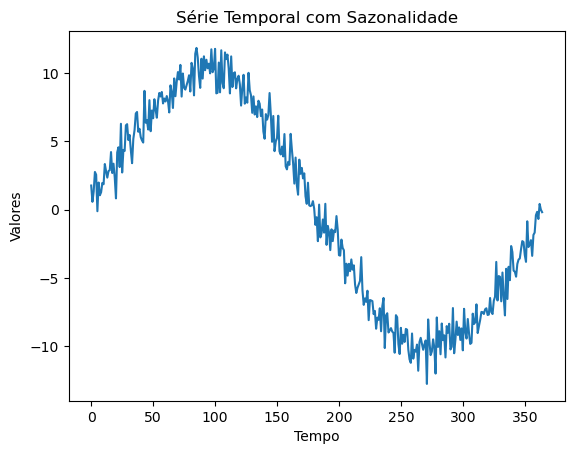

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando a série temporal com sazonalidade
np.random.seed(0)
t = np.arange(0, 365)
seasonality = 10 * np.sin(2 * np.pi * t / 365)
data = np.random.randn(365) + seasonality

# Plot da série temporal com sazonalidade
plt.plot(t, data)

# Configurações do eixo x (tempo)
plt.xlabel('Tempo')

# Configurações do eixo y (valores da série)
plt.ylabel('Valores')

# Título do gráfico
plt.title('Série Temporal com Sazonalidade')

# Exibição do gráfico
plt.show()